# Importing data

In [14]:
import pandas as pd
df=pd.read_csv("heart_dataset_updated.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3.0,145.0,233.0,1,0.0,150.0,0,2.3,0,0,1.0,1
1,37.0,1,2.0,130.0,NaN,0,1.0,187.0,0,3.5,0,0,2.0,1
2,41.0,0,1.0,130.0,204.0,0,0.0,172.0,0,1.4,2,0,2.0,1
3,56.0,1,1.0,120.0,236.0,0,1.0,178.0,0,0.8,2,0,2.0,1
4,57.0,0,0.0,120.0,354.0,0,1.0,163.0,1,0.6,2,0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0,0.0,140.0,241.0,0,1.0,123.0,1,0.2,1,0,3.0,0
299,45.0,1,3.0,110.0,264.0,0,1.0,132.0,0,1.2,1,0,3.0,0
300,68.0,1,0.0,144.0,193.0,1,1.0,141.0,0,3.4,1,2,3.0,0
301,57.0,1,0.0,130.0,131.0,0,1.0,115.0,1,1.2,1,1,3.0,0


# Data Cleaning

In [15]:
df.isna().sum()

age         4
sex         0
cp          6
trestbps    4
chol        4
fbs         0
restecg     1
thalach     3
exang       0
oldpeak     0
slope       0
ca          0
thal        1
target      0
dtype: int64

In [16]:
df.dtypes

age         float64
sex           int64
cp          float64
trestbps    float64
chol        float64
fbs           int64
restecg     float64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal        float64
target        int64
dtype: object

In [17]:
df['age']=df['age'].fillna(df['age'].mean())
df['age']=df['age'].astype(float)
#df['target'].dtype
#df['slope'].groupby(df['slope']).first()

In [18]:
df['cp']=df['cp'].fillna(df['cp'].mean())
df['cp']=df['cp'].astype(float)

In [19]:
df['trestbps']=df['trestbps'].fillna(df['trestbps'].mean())
df['trestbps']=df['trestbps'].astype(float)

In [20]:
df['chol']=df['chol'].fillna(df['chol'].mean())
df['chol']=df['chol'].astype(float)

In [21]:
df['restecg']=df['restecg'].fillna(0)
df['restecg']=df['restecg'].astype(float)

In [22]:
df['thalach']=df['thalach'].fillna(df['thalach'].mean())
df['thalach']=df['thalach'].astype(float)

In [23]:
df['thal'].groupby(df['thal']).first()
df['thal']=df['thal'].fillna(2)
df['thal']=df['thal'].astype(float)

In [24]:
df['target'].groupby(df['target']).first()

target
0    0
1    1
Name: target, dtype: int64

In [25]:
x=df.drop(columns='target')
y=df['target']
#print(y)

# Logistic Regression

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25)
from sklearn import preprocessing
acc_list=[]
for i in range(1,10):
    print("For i:",i)
    from sklearn.linear_model import LogisticRegression
    lr=LogisticRegression(max_iter=1000)
    lr.fit(X_train,Y_train)
    predt=lr.predict(X_test)
    #print(predt)

    from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
    cm=confusion_matrix(Y_test,predt)
    acc=accuracy_score(predt,Y_test)
    acc_list.append(acc)
    cr=classification_report(Y_test,predt)
    print('Accuracy score: ',acc)
    print('Confusion matrix:\n',cm)
    print('Classification report:\n',cr)

For i: 1
Accuracy score:  0.8552631578947368
Confusion matrix:
 [[25  8]
 [ 3 40]]
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.76      0.82        33
           1       0.83      0.93      0.88        43

    accuracy                           0.86        76
   macro avg       0.86      0.84      0.85        76
weighted avg       0.86      0.86      0.85        76

For i: 2
Accuracy score:  0.8552631578947368
Confusion matrix:
 [[25  8]
 [ 3 40]]
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.76      0.82        33
           1       0.83      0.93      0.88        43

    accuracy                           0.86        76
   macro avg       0.86      0.84      0.85        76
weighted avg       0.86      0.86      0.85        76

For i: 3
Accuracy score:  0.8552631578947368
Confusion matrix:
 [[25  8]
 [ 3 40]]
Classification report:
               precision  

In [27]:
print(max(acc_list))

0.8552631578947368


i=2 and i=5 are identical but f1-score for i=5 is more, therefore random_state=5 is best suited for LR with accuracy=0.8947

# K-Nearest Neighbours

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=0,test_size=0.25)

from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=11,weights='uniform') #n_neighbors=11 is random int
                        
kn.fit(X_train,Y_train)
kn_predt=kn.predict(X_test)
print(kn_predt)

kn_score=accuracy_score(kn_predt,Y_test)
print("Accuracy score: ",kn_score)

[0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0
 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 0 0]
Accuracy score:  0.75


In [29]:
#Calculating error for K-value
#1. for weights='distance'
import numpy as np
error=[]
for i in range(1,40):
    kn=KNeighborsClassifier(n_neighbors=i,weights='distance')
    kn.fit(X_train,Y_train)
    kn_predt=kn.predict(X_test)
    #print(kn_predt)
    error.append(np.mean(kn_predt!=Y_test))
print("Error:\n",error)

Error:
 [0.4342105263157895, 0.4342105263157895, 0.34210526315789475, 0.34210526315789475, 0.35526315789473684, 0.34210526315789475, 0.3684210526315789, 0.32894736842105265, 0.3157894736842105, 0.32894736842105265, 0.32894736842105265, 0.3026315789473684, 0.2894736842105263, 0.27631578947368424, 0.3157894736842105, 0.2894736842105263, 0.3157894736842105, 0.27631578947368424, 0.3026315789473684, 0.2894736842105263, 0.3157894736842105, 0.3157894736842105, 0.3157894736842105, 0.2894736842105263, 0.3026315789473684, 0.2894736842105263, 0.2894736842105263, 0.2894736842105263, 0.3157894736842105, 0.2894736842105263, 0.27631578947368424, 0.3026315789473684, 0.3026315789473684, 0.2894736842105263, 0.27631578947368424, 0.27631578947368424, 0.27631578947368424, 0.2631578947368421, 0.27631578947368424]


Text(0, 0.5, 'Mean Error')

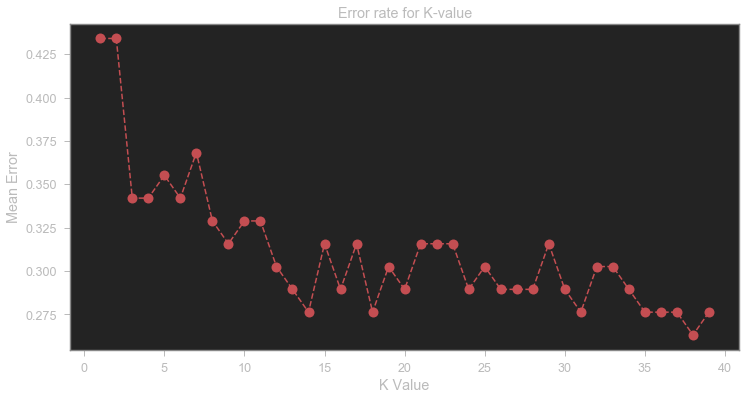

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(1,40),error,color='r',linestyle='dashed',marker='o',markersize=10)
plt.title('Error rate for K-value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Text(0, 0.5, 'Mean Error')

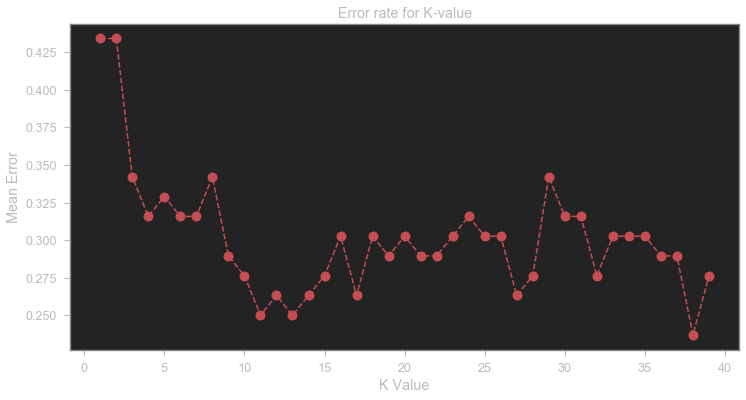

In [31]:
#2. for weights='uniform'
import numpy as np
error=[]
for i in range(1,40):
    kn=KNeighborsClassifier(n_neighbors=i,weights='uniform')
    kn.fit(X_train,Y_train)
    kn_predt=kn.predict(X_test)
    #print(kn_predt)
    error.append(np.mean(kn_predt!=Y_test))
#print("Error:\n",error)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(1,40),error,color='r',linestyle='dashed',marker='o',markersize=10)
plt.title('Error rate for K-value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Text(0, 0.5, 'Mean Error')

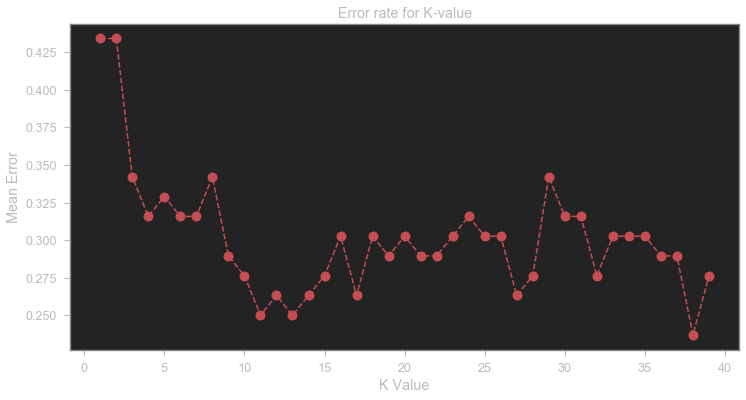

In [32]:
#3. for metric='euclidean'
import numpy as np
error=[]
for i in range(1,40):
    kn=KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    kn.fit(X_train,Y_train)
    kn_predt=kn.predict(X_test)
    #print(kn_predt)
    error.append(np.mean(kn_predt!=Y_test))
#print("Error:\n",error)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(1,40),error,color='r',linestyle='dashed',marker='o',markersize=10)
plt.title('Error rate for K-value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

for k=38 KNN gives more accurate and less error output

In [33]:
kn=KNeighborsClassifier(n_neighbors=38,weights='uniform') 
                        
kn.fit(X_train,Y_train)
kn_predt=kn.predict(X_test)
print(kn_predt)

kn_score=accuracy_score(kn_predt,Y_test)
print("Accuracy score: ",kn_score)

[0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0
 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0
 0 0]
Accuracy score:  0.7631578947368421


# Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier
acc_listd=[]
for i in range(1,10):
    print("for i:",i)
    dt=DecisionTreeClassifier(random_state=i)
    dt.fit(X_train,Y_train)
    dt_predt=dt.predict(X_test)
    print(dt_predt)

    dt_score=accuracy_score(dt_predt,Y_test)
    acc_listd.append(dt_score)
    print("Accuracy score: ",dt_score)

for i: 1
[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0
 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 0 0]
Accuracy score:  0.7894736842105263
for i: 2
[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0
 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 0 0]
Accuracy score:  0.8026315789473685
for i: 3
[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0
 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 0 0]
Accuracy score:  0.8026315789473685
for i: 4
[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0
 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 0 0]
Accuracy score:  0.8157894736842105
for i: 5
[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0
 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0
 0 0]
Accuracy score:  0.802631578947

In [35]:
print("Accuracy max: ",max(acc_listd))

Accuracy max:  0.8289473684210527


# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500,random_state=0)#n_estimators=10 is random int,random_state is default
rf.fit(X_train,Y_train)
rf_predt=rf.predict(X_test)
print(rf_predt)

rf_acc=accuracy_score(rf_predt,Y_test)
print("Accuracy score: ",rf_acc)
rf_cr=classification_report(Y_test,rf_predt)
print("classification report:\n", rf_cr)

[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 0 1]
Accuracy score:  0.868421052631579
classification report:
               precision    recall  f1-score   support

           0       0.93      0.76      0.83        33
           1       0.84      0.95      0.89        43

    accuracy                           0.87        76
   macro avg       0.88      0.86      0.86        76
weighted avg       0.88      0.87      0.87        76



In [37]:
est=[]
for i in range(1,100):
    rf=RandomForestClassifier(n_estimators=i,random_state=0)
    rf.fit(X_train,Y_train)
    rf_predt=rf.predict(X_test)
    est.append(np.mean(rf_predt!= Y_test))
#print(est)

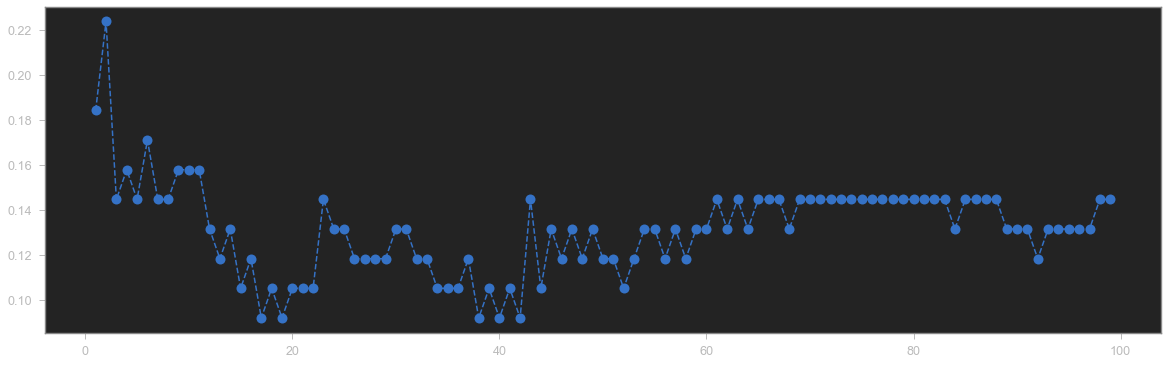

In [38]:
plt.figure(figsize=(20,6))
plt.plot(range(1,100),est,color='b',marker='o',linestyle='dashed',markersize=10)

Based on the above graph n_estimator=17,19,38,40,42 gives high accuracy and less error

In [39]:
from sklearn.ensemble import RandomForestClassifier
est=[17,19,38,40,42]
acc_rf=[]
for i in est:
    print("for est: ",i)
    rf=RandomForestClassifier(n_estimators=i,random_state=0)
    rf.fit(X_train,Y_train)
    rf_predt=rf.predict(X_test)
    print(rf_predt)

    rf_acc=accuracy_score(rf_predt,Y_test)
    acc_rf.append(rf_acc)
    print("Accuracy score: ",rf_acc)
    rf_cr=classification_report(Y_test,rf_predt)
    print("classification report:\n", rf_cr)

for est:  17
[0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 0 1]
Accuracy score:  0.9078947368421053
classification report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.89      0.95      0.92        43

    accuracy                           0.91        76
   macro avg       0.91      0.90      0.91        76
weighted avg       0.91      0.91      0.91        76

for est:  19
[0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 0 1]
Accuracy score:  0.9078947368421053
classification report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.89      0.95      0.92        43

    accuracy                           0.91        

In [40]:
print("Accuracy max: ",max(acc_rf))

Accuracy max:  0.9078947368421053


# SVM

In [41]:
from sklearn.svm import SVC
sv=SVC(kernel='linear',C=0.001)
sv.fit(X_train,Y_train)
sv_predt=sv.predict(X_test)
sv_acc=accuracy_score(sv_predt,Y_test)
print("Accuracy score: ",sv_acc)

Accuracy score:  0.7631578947368421


In [42]:
df={'Algorithms':['Logistic Regression','KNN','DecisionTreeClassifier','RandomForestClassifier','SVM'],
   'Accuracy':[max(acc_list),kn_score,max(acc_listd),max(acc_rf),sv_acc]}
df=pd.DataFrame(df)
print(df.sort_values(by='Accuracy',ascending=False).reset_index())

   index              Algorithms  Accuracy
0      3  RandomForestClassifier  0.907895
1      0     Logistic Regression  0.855263
2      2  DecisionTreeClassifier  0.828947
3      1                     KNN  0.763158
4      4                     SVM  0.763158
